In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
dataset_path = os.getcwd() + '\Datasets\Original\\'

test_full = pd.read_csv(dataset_path + 'full_test_plaintext.txt', sep = '\t')
train_full = pd.read_csv(dataset_path + 'full_train_plaintext.txt', sep = '\t')
valid_full = pd.read_csv(dataset_path + 'full_valid_plaintext.txt', sep = '\t')

test_img = pd.read_csv(dataset_path + 'img_test_plaintext.txt', sep = '\t')
train_img = pd.read_csv(dataset_path + 'img_train_plaintext.txt', sep = '\t')
valid_img = pd.read_csv(dataset_path + 'img_valid_plaintext.txt', sep = '\t')

test_balanced = pd.read_csv(dataset_path + 'balanced_test_plaintext.txt', sep = '\t')

emoji_map = pd.read_csv(dataset_path + 'emoji_map_1791.csv')

# Sanity Check

**Key Points:**

1. Tweets that contain a quoted tweet ends with _q (train, test, valid_img do not contain _q)

2. For tweets that contain a quoted tweet with pic, that tweet ID is not included in img.txt, but the text in the quoted tweet is considered. (See codes below)
e.g. id 742700829703057408_q is in full_test but not img_test

3. Idk for this case, 742886817339432962_q.. annotations: 1 emoji that belongs to the quoted tweet. However, we have two other emojis in the tweet itself. 747532397315395584_q, 743594076503683072_q, 747522541464453120_q, 744959564504793088_q too

4. 747159552718680064_q have 4 emojis in main tweet but only 1 annotation..
Conclusion: I think they only see the quoted tweet not the main tweet if that tweet contains a quoted tweet

5. 753324941404147712 2 annotations: flower and heart -> heart from the pic??, but 742960387843338241 doesnt take into account the emoji in the pic

6. 746283452740206592 weird annotations. In full_train_plaintext only hv 5 annotations, img_test 4 annotations, img_train -> a lot

It's a reply to a main tweet and all the replies in that thread are considered.
Try this "emoji_map.loc[[768, 775, 520, 776, 525, 784, 785, 787, 1556, 791, 537, 1562, 539, 540, 796, 1310, 798, 544, 806, 554, 557, 1582, 815, 818, 1330, 566, 567, 56, 569, 58, 57, 824, 1598, 577, 1604, 585, 1354, 593, 1361, 1362, 1365, 1367, 600, 1119, 1125, 1126, 615, 103, 1389, 1134, 1144, 1406, 130, 642, 648, 649, 1162, 651, 652, 1167, 143, 1169, 913, 916, 662, 663, 664, 919, 920, 1180, 1437, 670, 926, 930, 681, 684, 174, 1200, 1201, 177, 1210, 1217, 200, 721, 1255, 1263, 754, 757, 509, 510], 'ucode']"

Maybe the API will answer every doubt we have :)

In [3]:
print("Total test rows: " + str(len(test_full)))
print("Total test tweets containing a quoted tweet: " + str(len(test_full[(test_full['id'].str[-2:] == "_q")])))
test_full.head()

Total test rows: 1000000
Total test tweets containing a quoted tweet: 53482


,id,annotations
0,747643690521341953,1138
1,746196870121164800,1056
2,744595559470800896,1381
3,747720844730859520,"889,1128"
4,743285629576843264,1424


In [4]:
print("Total training rows: " + str(len(train_full)))
print("Total training tweets containing a quoted tweet: " + str(len(train_full[(train_full['id'].str[-2:] == "_q")])))
train_full.head()

Total training rows: 12997219
Total training tweets containing a quoted tweet: 690524


,id,annotations
0,744014442837454848,"47,883"
1,742407819496919041,1381
2,744101567981359105,1421
3,744692442033577984,1056
4,746426733834944512,"1056,1381"


In [5]:
print("Total validation rows: " + str(len(valid_full)))
print("Total validation tweets containing a quoted tweet: " + str(len(valid_full[(valid_full['id'].str[-2:] == "_q")])))
valid_full.head()

Total validation rows: 1000000
Total validation tweets containing a quoted tweet: 53332


,id,annotations
0,746634523048292352,"1103,1389,1399"
1,741650544847147009,1381
2,746803092239196162,1424
3,746625375875170304,1107
4,744724790485757952,1620


In [6]:
test_img = test_img.astype({'id': str})
print("Total test image rows: " + str(len(test_img)))
print("total test image tweets containing a quoted tweet: " + str(len(test_img[(test_img['id'].str[-2:] == "_q")])))
test_img.head()

Total test image rows: 79191
total test image tweets containing a quoted tweet: 0


,id,imgid,annotations
0,748230468458418177,http://pbs.twimg.com/media/CmI_nUeWkAAoDLm.jpg,1382
1,747854910612398081,http://pbs.twimg.com/media/CmDqE7qUkAA4oZH.jpg,"174,1108"
2,742432606709485568,http://pbs.twimg.com/media/Ci6Hi8xVEAAUkST.jpg,186
3,742257533616816128,http://pbs.twimg.com/media/Ckxuh4SXIAEQZQX.jpg,78
4,747312758127890432,http://pbs.twimg.com/media/Cl78_KTUsAAj-wC.jpg,"156,601,1109"


In [7]:
train_img = train_img.astype({'id': str})
print("Total training image rows: " + str(len(train_img)))
print("Total training image tweets that containing a quoted tweet: " + str(len(train_img[(train_img['id'].str[-2:] == "_q")])))
train_img.head()

Total training image rows: 916864
Total training image tweets that containing a quoted tweet: 0


,id,imgid,annotations
0,744014442837454848,http://pbs.twimg.com/media/ClNFMNSWgAI7qq0.jpg,"47,883"
1,742240402288345088,http://pbs.twimg.com/media/CkzuE33WsAA2cUB.jpg,229
2,742427564535353349,http://pbs.twimg.com/media/Ck2h7lzXIAA0Aqw.jpg,658
3,747888709375229952,http://pbs.twimg.com/media/CmEIe-_VYAADvg0.jpg,"1108,1108"
4,747199027649871872,http://pbs.twimg.com/media/Cl6UJF1XIAADDAJ.jpg,1466


In [8]:
valid_img = valid_img.astype({'id': str})
print("Total validation image rows: " + str(len(valid_img)))
print("total validation image tweets containing a quoted tweet: " + str(len(valid_img[(valid_img['id'].str[-2:] == "_q")])))
valid_img.head()

Total validation image rows: 79419
total validation image tweets containing a quoted tweet: 0


,id,imgid,annotations
0,746473363992784897,http://pbs.twimg.com/media/Clv7F6mVAAIw28L.jpg,1105
1,747463019911843840,http://pbs.twimg.com/media/Cl9sTJQWYAEm4q9.jpg,"186,503,1111,1112,1113,1114"
2,742355654052978689,http://pbs.twimg.com/media/Ck1ggjFUoAE58nB.jpg,"186,635"
3,748291920175173632,http://pbs.twimg.com/media/Cl7U_BbUsAEasQD.jpg,78
4,746296637509668866,http://pbs.twimg.com/media/Clrhp96UYAAQOmv.jpg,"186,426"


In [9]:
print("Total balanced rows: " + str(len(test_balanced)))
print("total balanced tweets containing a quoted tweet: " + str(len(test_balanced[(test_balanced['id'].str[-2:] == "_q")])))
test_balanced.head()

Total balanced rows: 9528
total balanced tweets containing a quoted tweet: 659


,id,annotations
0,742207272537886721,575
1,746284085362966528,"24,25,186,187,217,550,560,979,980,1126,1219,12..."
2,741070803807043585_q,1516
3,744681934626791428,"761,1088"
4,747676925183803392,659


In [10]:
print("Size of emoji map:", emoji_map.shape)
emoji_map.head()

Size of emoji map: (1791, 11)


,Unnamed: 0,category,title,shorts,unicode_alternates,keywords,ucode_short,ucode,aliases,alt_title,aliases_ascii
0,#️⃣,symbols,keycap number sign,[hash],0023-fe0f-20e3,"[keycap, symbol, pound, hash, number]",0023_fe0f_20e3,#️⃣,NaN,NaN,NaN
1,*️⃣,symbols,keycap asterisk,[asterisk],002a-fe0f-20e3,"[keycap, symbol, asterisk, star]",002a_fe0f_20e3,*️⃣,[:keycap_asterisk:],NaN,NaN
2,0️⃣,symbols,keycap digit zero,[zero],0030-fe0f-20e3,"[, keycap, symbol, number, zero, math]",0030_fe0f_20e3,0️⃣,NaN,NaN,NaN
3,1️⃣,symbols,keycap digit one,[one],0031-fe0f-20e3,"[, keycap, symbol, number, one, math]",0031_fe0f_20e3,1️⃣,NaN,NaN,NaN
4,2️⃣,symbols,keycap digit two,[two],0032-fe0f-20e3,"[, keycap, symbol, two, number, math]",0032_fe0f_20e3,2️⃣,NaN,NaN,NaN


In [11]:
emoji_map.rename(columns={'Unnamed: 0': 'ucode1'}, inplace=True)
emoji_map[(emoji_map['ucode1'] == emoji_map['ucode'])].shape
# ucode and ucode1 are the same because the shapes are the same

(1791, 11)

In [12]:
# emoji_map.loc[[768, 775, 520, 776, 525, 784, 785, 787, 1556, 791, 537, 1562, 539, 540, 796, 1310, 798, 544, 806, 554, 557, 1582, 815, 818, 1330, 566, 567, 56, 569, 58, 57, 824, 1598, 577, 1604, 585, 1354, 593, 1361, 1362, 1365, 1367, 600, 1119, 1125, 1126, 615, 103, 1389, 1134, 1144, 1406, 130, 642, 648, 649, 1162, 651, 652, 1167, 143, 1169, 913, 916, 662, 663, 664, 919, 920, 1180, 1437, 670, 926, 930, 681, 684, 174, 1200, 1201, 177, 1210, 1217, 200, 721, 1255, 1263, 754, 757, 509, 510], 'ucode']
emoji_map.loc[1393, 'ucode']

'😎'

# Cleaning

## Remove duplicate annotations (and store them in a sorted list)

For train_full, test_full, and valid_full, I think there are no duplicates and already in order. For the image, a lot of duplicates
-- Clifton

In [13]:
remove_duplicates = lambda annotation : sorted(list(int(x) for x in set(annotation.split(","))))

In [14]:
test_full["annotations"] = test_full["annotations"].apply(remove_duplicates)
train_full["annotations"] = train_full["annotations"].apply(remove_duplicates)
valid_full["annotations"] = valid_full["annotations"].apply(remove_duplicates)

test_img["annotations"] = test_img["annotations"].apply(remove_duplicates)
train_img["annotations"] = train_img["annotations"].apply(remove_duplicates)
valid_img["annotations"] = valid_img["annotations"].apply(remove_duplicates)

test_balanced["annotations"] = test_balanced["annotations"].apply(remove_duplicates)

## Filter out Tweets with Images

Key Point:
- There are some tweets in train_img but not in train_full (e.g. 760790155389243393)

In [15]:
train_text = pd.concat([train_full, train_img])
print("Total training rows without imgid before: " + str(len(train_text[train_text["imgid"].isnull()])))
print("Total training rows with imgid before: " + str(len(train_text[train_text["imgid"].notnull()])))

train_text = train_text.drop_duplicates(subset = 'id', keep = False)
print("Total training rows without imgid after: " + str(len(train_text[train_text["imgid"].isnull()])))
print("Total training rows with imgid after: " + str(len(train_text[train_text["imgid"].notnull()])))

train_text = train_text[train_text["imgid"].isnull()]
train_text = train_text.drop('imgid', axis=1)
print("Total rows in train_text final: " + str(len(train_text)))

Total training rows without imgid before: 12997219
Total training rows with imgid before: 916864
Total training rows without imgid after: 12124064
Total training rows with imgid after: 43709
Total rows in train_text final: 12124064


In [16]:
test_text = pd.concat([test_full, test_img])
print("Total test rows without imgid before: " + str(len(test_text[test_text["imgid"].isnull()])))
print("Total test rows with imgid before: " + str(len(test_text[test_text["imgid"].notnull()])))

test_text = test_text.drop_duplicates(subset = 'id', keep = False)
print("Total test rows without imgid after: " + str(len(test_text[test_text["imgid"].isnull()])))
print("Total test rows with imgid after: " + str(len(test_text[test_text["imgid"].notnull()])))

test_text = test_text[test_text["imgid"].isnull()]
test_text = test_text.drop('imgid', axis=1)
print("Total test rows in test_text final: " + str(len(test_text)))

Total test rows without imgid before: 1000000
Total test rows with imgid before: 79191
Total test rows without imgid after: 932573
Total test rows with imgid after: 11764
Total test rows in test_text final: 932573


In [17]:
valid_text = pd.concat([valid_full, valid_img])
print("Total validation rows without imgid before: " + str(len(valid_text[valid_text["imgid"].isnull()])))
print("Total validation rows with imgid before: " + str(len(valid_text[valid_text["imgid"].notnull()])))

valid_text = valid_text.drop_duplicates(subset = 'id', keep = False)
print("Total validation rows without imgid after: " + str(len(valid_text[valid_text["imgid"].isnull()])))
print("Total validation rows with imgid after: " + str(len(valid_text[valid_text["imgid"].notnull()])))

valid_text = valid_text[valid_text["imgid"].isnull()]
valid_text = valid_text.drop('imgid', axis=1)
print("Total validation rows in valid_text final: " + str(len(valid_text)))

Total validation rows without imgid before: 1000000
Total validation rows with imgid before: 79419
Total validation rows without imgid after: 932533
Total validation rows with imgid after: 11952
Total validation rows in valid_text final: 932533


In [18]:
train_text

,id,annotations
1,742407819496919041,[1381]
2,744101567981359105,[1421]
3,744692442033577984,[1056]
4,746426733834944512,"[1056, 1381]"
5,744959564504793088_q,[616]
...,...,...
12997214,744270931997171712,[1210]
12997215,743546441591721984,[1447]
12997216,742894986304344064,"[12, 114, 1111]"
12997217,741607748975132672,[1428]


In [19]:
test_text

,id,annotations
0,747643690521341953,[1138]
1,746196870121164800,[1056]
2,744595559470800896,[1381]
3,747720844730859520,"[889, 1128]"
4,743285629576843264,[1424]
...,...,...
999995,742645704074481664,[1105]
999996,747015502791335936,[1400]
999997,744745632141737984,[807]
999998,747071768817471488,[1389]


In [20]:
valid_text

,id,annotations
0,746634523048292352,"[1103, 1389, 1399]"
1,741650544847147009,[1381]
2,746803092239196162,[1424]
3,746625375875170304,[1107]
4,744724790485757952,[1620]
...,...,...
999995,747420757790162944,[1620]
999996,744673950962225152,[544]
999997,741743895000809472,[1415]
999998,745039072628899841,[1447]


## Remove Tweets with A Quoted Tweet

In [21]:
test_text = test_text[test_text['id'].str[-2:] != "_q"]
train_text = train_text[train_text['id'].str[-2:] != "_q"]
valid_text = valid_text[valid_text['id'].str[-2:] != "_q"]

In [22]:
test_text

,id,annotations
0,747643690521341953,[1138]
1,746196870121164800,[1056]
2,744595559470800896,[1381]
3,747720844730859520,"[889, 1128]"
4,743285629576843264,[1424]
...,...,...
999995,742645704074481664,[1105]
999996,747015502791335936,[1400]
999997,744745632141737984,[807]
999998,747071768817471488,[1389]


In [23]:
train_text

,id,annotations
1,742407819496919041,[1381]
2,744101567981359105,[1421]
3,744692442033577984,[1056]
4,746426733834944512,"[1056, 1381]"
6,743951261607690240,[1387]
...,...,...
12997214,744270931997171712,[1210]
12997215,743546441591721984,[1447]
12997216,742894986304344064,"[12, 114, 1111]"
12997217,741607748975132672,[1428]


In [24]:
valid_text

,id,annotations
0,746634523048292352,"[1103, 1389, 1399]"
1,741650544847147009,[1381]
2,746803092239196162,[1424]
3,746625375875170304,[1107]
4,744724790485757952,[1620]
...,...,...
999995,747420757790162944,[1620]
999996,744673950962225152,[544]
999997,741743895000809472,[1415]
999998,745039072628899841,[1447]


## Observing emoji frequency distribution

1381 😂
1424 😭
1392 😍
1447 🙄
186 ❤
1389 😊
1420 😩
1620 🤔
1403 😘
763 🏽
762 🏼
764 🏾
1138 💯
1107 💕
1446 🙃


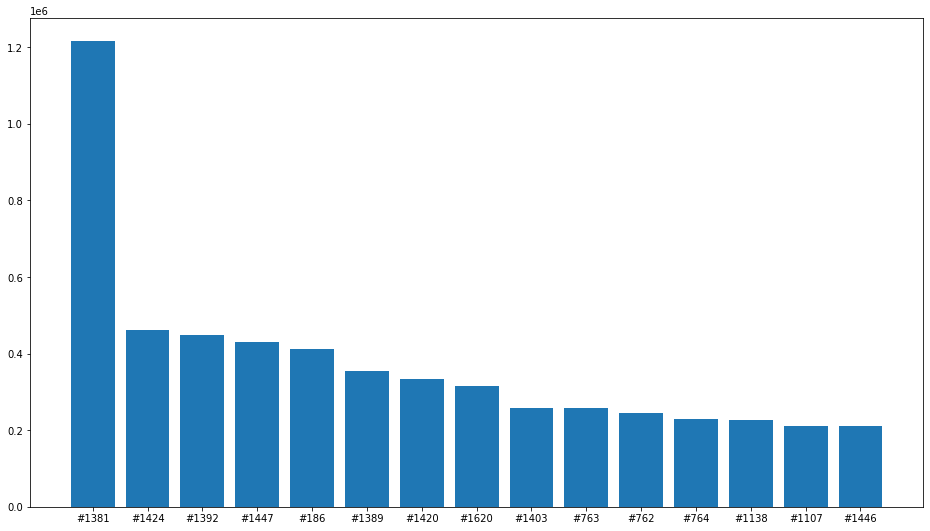

In [25]:
freq_dict = {}

def count_freq(annotations):
    for i in annotations:
        freq_dict[i] = freq_dict.get(i, 0) + 1

train_text["annotations"].apply(count_freq)

freq_dict = dict(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:15])

for emoji_number in freq_dict.keys():
    print(emoji_number, emoji_map.loc[int(emoji_number), "ucode"])

ucode_dict = {}
for emoji_number in freq_dict.keys():
    ucode_dict[f"#{emoji_number}"] = freq_dict[emoji_number]

plt.figure(figsize=(16, 9))
plt.bar(*zip(*ucode_dict.items()))
plt.show()

Remove weird emojis and keep the 12 remaining.

In [26]:
emoji_list_final = list(freq_dict.keys())
emoji_list_final.remove(762)
emoji_list_final.remove(764)
emoji_list_final.remove(1107)
emoji_map_final = emoji_map.iloc[emoji_list_final, :]
emoji_map_final.iloc[:,[0,2]]

,ucode1,title
1381,😂,face with tears of joy
1424,😭,loudly crying face
1392,😍,smiling face with heart shaped eyes
1447,🙄,face with rolling eyes
186,❤,heavy black heart
1389,😊,smiling face with smiling eyes
1420,😩,weary face
1620,🤔,thinking face
1403,😘,face throwing a kiss
763,🏽,emoji modifier fitzpatrick type


In [27]:
emoji_list_final

[1381, 1424, 1392, 1447, 186, 1389, 1420, 1620, 1403, 763, 1138, 1446]

Only keep the top 12 emoji as part of the labels.

In [28]:
def label(annotations):
    if annotations:
        lst = []
        for i in annotations:
            if i in emoji_list_final:
                lst.append(i)
        if lst:
            return lst
        else:
            return

In [29]:
pd.set_option('mode.chained_assignment', None) # suppress SettingCopyWarning
train_text["annotations"] = train_text["annotations"].apply(label)
train_text.shape

(11433540, 2)

In [30]:
train_final = train_text[~train_text.annotations.isnull()]
train_final

,id,annotations
1,742407819496919041,[1381]
4,746426733834944512,[1381]
7,747973915104972804,[763]
9,741489131524493312,[1389]
13,743594091108274180,[763]
...,...,...
12997202,743063847964053505,[1424]
12997204,741479246615433216,[1446]
12997209,743318311333572608,[1447]
12997211,742068066952065025,[1447]


In [31]:
valid_text["annotations"] = valid_text["annotations"].apply(label)
valid_final = valid_text[~valid_text.annotations.isnull()]
valid_final

,id,annotations
0,746634523048292352,[1389]
1,741650544847147009,[1381]
2,746803092239196162,[1424]
4,744724790485757952,[1620]
8,747681608430387200,[1424]
...,...,...
999990,741822517090918401,[186]
999991,742212828476510209,[1381]
999995,747420757790162944,[1620]
999998,745039072628899841,[1447]


In [32]:
test_text["annotations"] = test_text["annotations"].apply(label)
test_final = test_text[~test_text.annotations.isnull()]
test_final

,id,annotations
0,747643690521341953,[1138]
2,744595559470800896,[1381]
4,743285629576843264,[1424]
6,746745350023675905,[1381]
7,742177996266606593,[186]
...,...,...
999988,743469083082002432,[1447]
999991,744928341900275712,[1381]
999993,748002024017530880,[1389]
999998,747071768817471488,[1389]


Put your emoji number to filter the train, test, and valid for that emoji.

If you are doing for the first emoji put `emoji_number = 1` -- Hari

In [33]:

emoji_number = 1 # modify to 1-12
def check(annotations):
    if emoji_list_final[emoji_number-1] in annotations:
        return True
    return False

train_text_emoji = train_final[train_final["annotations"].apply(check)]
test_text_emoji = test_final[test_final["annotations"].apply(check)]
valid_text_emoji= valid_final[valid_final["annotations"].apply(check)]

In [34]:
print(f"Train size for emoji {emoji_number}: {train_text_emoji.shape}")
print(f"Test size for emoji {emoji_number}: {test_text_emoji.shape}")
print(f"Validation size for emoji {emoji_number}: {valid_text_emoji.shape}")

Train size for emoji 1: (1216731, 2)
Test size for emoji 1: (93600, 2)
Validation size for emoji 1: (93216, 2)


In [35]:
test_text_emoji.head() # just an example

,id,annotations
2,744595559470800896,[1381]
6,746745350023675905,[1381]
13,742734050788544512,"[1381, 1620]"
27,743918650323787776,[1381]
51,743550851080421376,[1381]


## Get The Tweets and Remove Unavailable Tweets



In [36]:
# consumer key / API key = BFkhoyYPvdDg6vRTgHAYyAa9r
# consumer key secret / API key secret = Hx5OQOgLxP2fsqLoUUGRdJycBhisYg1uac8vtSqdLyLijUkvcD
# bearer token = AAAAAAAAAAAAAAAAAAAAAHdSUQEAAAAAzd%2B01SA5YHfDQmy3h7VX2OYyiC4%3Dd2eQEh8Z2nAQ9zWBMyKlyjOKwjwb7lwUJT4SEDTWcCFxz3xHmX
# access token = 1443079270301978625-vzmeZhaly1A7mmS861eBoF9eAF2eWW
# access token secret = MR3rzfGlS9MHsT3B7bDBfwU7yAU5RS7F8MVYtSoGXmHGj

In [37]:
import tweepy

consumer_key = 'BFkhoyYPvdDg6vRTgHAYyAa9r'
consumer_secret = 'Hx5OQOgLxP2fsqLoUUGRdJycBhisYg1uac8vtSqdLyLijUkvcD'
access_key= '1443079270301978625-vzmeZhaly1A7mmS861eBoF9eAF2eWW'
access_secret = 'MR3rzfGlS9MHsT3B7bDBfwU7yAU5RS7F8MVYtSoGXmHGj'

In [38]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

In [39]:
api = tweepy.API(auth)

**WARNING**

There might be a problem if you run the tests multiple times

If you encounter problems such as extracting tweets too fast 

Or the dataset returns all empty tweets

Just restart the notebook and run for that specific set

-- Hari

In [40]:
count_valid, count_test, count_train = 0, 0, 0
def get_tweets_valid(id):
    global count_valid
    try:
        if count_valid >= 2000:
            return
        x = api.get_status(id).text
        count_valid += 1
        if count_valid % 20 == 0:
            print(f"Checkpoint {count_valid}")
        return x
    except:
        return

def get_tweets_test(id):
    global count_test
    try:
        if count_test >= 2000:
            return
        x = api.get_status(id).text
        count_test += 1
        if count_test % 20 == 0:
            print(f"Checkpoint {count_test}")
        return x
    except:
        return

def get_tweets_train(id):
    global count_train
    try:
        if count_train >= 5000:
            return
        x = api.get_status(id).text
        count_train += 1
        if count_train % 20 == 0:
            print(f"Checkpoint {count_train}")
        return x
    except:
        return

Sample 100000 random from the emoji sample set for each train, test, and valid

In [41]:
train_text_emoji = train_text_emoji.sample(n=100000, random_state=23, ignore_index=True, replace=True)
test_text_emoji = test_text_emoji.sample(n=100000, random_state=23, ignore_index=True, replace=True)
valid_text_emoji = valid_text_emoji.sample(n=100000, random_state=23, ignore_index=True, replace=True)

Get tweets for train, test, and validation

In [ ]:
train_text_emoji["tweets"] = train_text_emoji["id"].apply(get_tweets_train)
train_text_emoji = train_text_emoji[~test_text_emoji["tweets"].isnull()]

In [ ]:
test_text_emoji["tweets"] = test_text_emoji["id"].apply(get_tweets_test)
test_text_emoji = test_text_emoji[~test_text_emoji["tweets"].isnull()]

In [ ]:
valid_text_emoji["tweets"] = valid_text_emoji["id"].apply(get_tweets_valid)
valid_text_emoji = valid_text_emoji[~test_text_emoji["tweets"].isnull()]

# Saving final files to CSV

In [ ]:
train_text_emoji.to_csv(dataset_path + 'train_text_emoji.csv', index=False)
test_text_emoji.to_csv(dataset_path + 'test_text_emoji.csv', index=False)
valid_text_emoji.to_csv(dataset_path + 'valid_text_emoji.csv', index=False)

# Combining all processes

In [ ]:
def get_csv_from_emoji(emoji_number):
    def check(annotations):
        if emoji_list_final[emoji_number-1] in annotations:
            return True
        return False

    train_text_emoji = train_final[train_final["annotations"].apply(check)]
    test_text_emoji = test_final[test_final["annotations"].apply(check)]
    valid_text_emoji = valid_final[valid_final["annotations"].apply(check)]

    print(f"Train size for emoji {emoji_number}: {train_text_emoji.shape}")
    print(f"Test size for emoji {emoji_number}: {test_text_emoji.shape}")
    print(f"Validation size for emoji {emoji_number}: {valid_text_emoji.shape}")

    count_valid, count_test, count_train = 0, 0, 0
    
    def get_tweets_valid(id):
        nonlocal count_valid
        try:
            if count_valid >= 2000:
                return
            x = api.get_status(id).text
            count_valid += 1
            if count_valid % 20 == 0:
                print(f"Checkpoint {count_valid}")
            return x
        except:
            return

    def get_tweets_test(id):
        nonlocal count_test
        try:
            if count_test >= 2000:
                return
            x = api.get_status(id).text
            count_test += 1
            if count_test % 20 == 0:
                print(f"Checkpoint {count_test}")
            return x
        except:
            return

    def get_tweets_train(id):
        nonlocal count_train
        try:
            if count_train >= 5000:
                return
            x = api.get_status(id).text
            count_train += 1
            if count_train % 20 == 0:
                print(f"Checkpoint {count_train}")
            return x
        except:
            return

    train_text_emoji["tweets"] = train_text_emoji["id"].apply(get_tweets_train)
    train_text_emoji = train_text_emoji[~test_text_emoji["tweets"].isnull()]

    test_text_emoji["tweets"] = test_text_emoji["id"].apply(get_tweets_test)
    test_text_emoji = test_text_emoji[~test_text_emoji["tweets"].isnull()]

    valid_text_emoji["tweets"] = valid_text_emoji["id"].apply(get_tweets_valid)
    valid_text_emoji = valid_text_emoji[~test_text_emoji["tweets"].isnull()]

    train_text_emoji.to_csv(dataset_path + f'train_text_emoji_{emoji_number}.csv', index=False)
    test_text_emoji.to_csv(dataset_path + f'test_text_emoji_{emoji_number}.csv', index=False)
    valid_text_emoji.to_csv(dataset_path + f'valid_text_emoji_{emoji_number}.csv', index=False)

In [ ]:
# Will take a very long time!
for num in range(1, 13):
    get_csv_from_emoji(num)